In [17]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
import pandas as pd

In [18]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20240913_141235.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20240913_141235.braidz using pyarrow


In [3]:
df,csvs["opto"]

(          obj_id    frame     timestamp         x         y         z  \
 0              0   100014  1.726230e+09 -0.170874  0.081477 -0.001250   
 1              0   100015  1.726230e+09 -0.170553  0.081322 -0.001802   
 2              0   100016  1.726230e+09 -0.170763  0.081363 -0.001628   
 3              0   100017  1.726230e+09 -0.170888  0.081432 -0.001412   
 4              0   100018  1.726230e+09 -0.170916  0.081466 -0.001286   
 ...          ...      ...           ...       ...       ...       ...   
 10281979  140930  8289281  1.726312e+09 -0.013394  0.088836 -0.004328   
 10281980  140930  8289282  1.726312e+09 -0.013526  0.088754 -0.004341   
 10281981  140930  8289283  1.726312e+09 -0.013657  0.088689 -0.004367   
 10281982  140930  8289284  1.726312e+09 -0.013766  0.088653 -0.004357   
 10281983  140930  8289285  1.726312e+09 -0.013866  0.088608 -0.004349   
 
               xvel      yvel      zvel           P00           P01  \
 0        -0.001498 -0.000098 -0.000465

In [15]:
timestamps = []
for idx, row in csvs["opto"].iterrows():
    obj_id = int(row.obj_id)
    frame = int(row.frame)

    timestamps.append(df[(df.obj_id == obj_id) & (df.frame == frame)].timestamp.values)

In [4]:
data = extract_stimulus_centered_data(df, csvs["opto"])

In [5]:
median_obj_id = filtering.filter_by_median_position(df, xlim=[-0.2, 0.2], ylim=[-0.2, 0.2], zlim=[0.1, 0.3])
duration_obj_id = filtering.filter_by_duration(df, threshold=5)

shared_elements = set(median_obj_id) & set(duration_obj_id)
shared_elements

{1561,
 2596,
 2650,
 3338,
 4857,
 5075,
 5909,
 6197,
 6623,
 7449,
 9948,
 10751,
 15875,
 16913,
 17420,
 29861,
 56379,
 56973,
 63785,
 68144,
 72867,
 83556,
 88952,
 95846,
 98773,
 100583,
 100711,
 105010,
 105288,
 129856,
 130202,
 131446,
 132334,
 134053,
 134161,
 135299,
 138116,
 138380,
 139148,
 139737,
 139740}

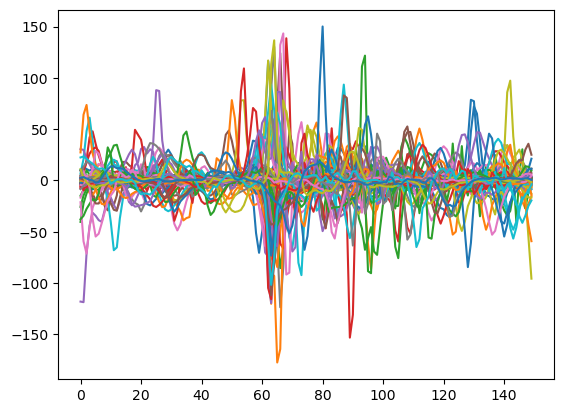

In [6]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

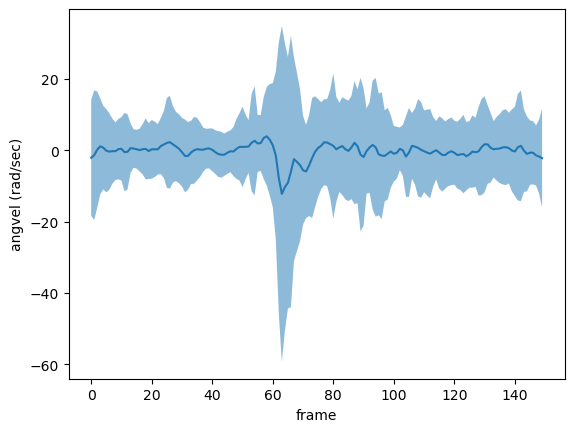

In [7]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

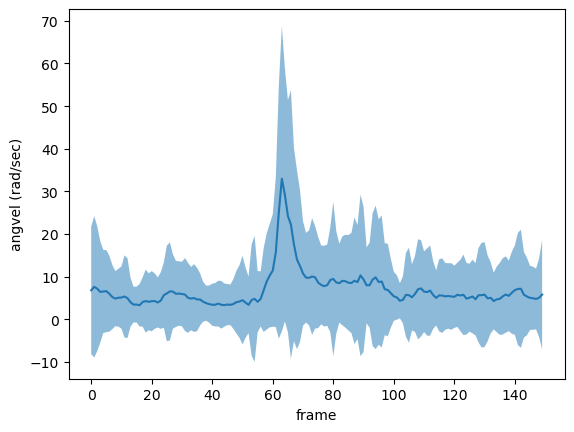

In [8]:
fig, ax = plt.subplots()
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

<Axes: >

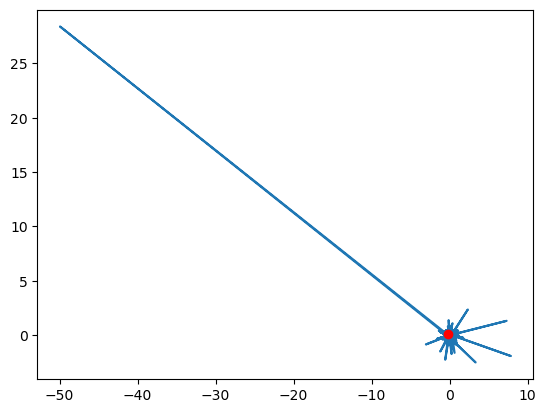

In [9]:
plot_trajectory(df)

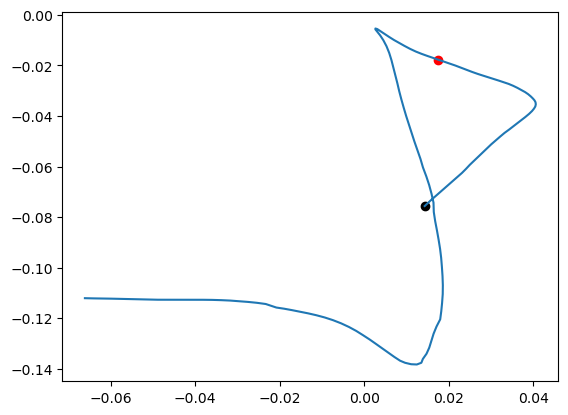

In [10]:
i = 7
traj = data["position"][i]

fig = plt.figure()
plt.plot(traj[:,0], traj[:,1])
plt.scatter(traj[50,0], traj[50,1], color="red")
plt.scatter(traj[0,0], traj[0,1], color="black")
plt.show()

In [11]:
data1_max = np.max(np.abs(np.asarray(data["angular_velocity"])[:, 50:80]), axis=1)

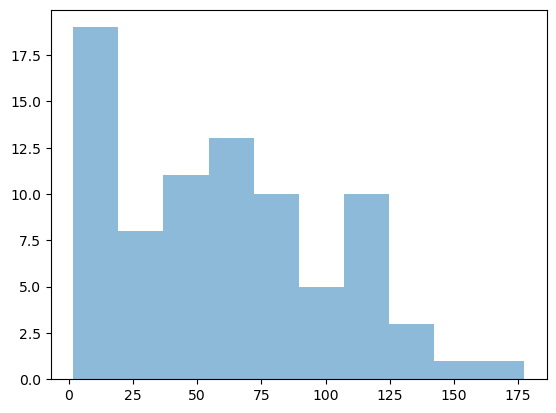

In [12]:
plt.figure()
plt.hist(data1_max, alpha=0.5)
plt.show()

In [13]:
mean_data = np.mean(data1_max)
print(mean_data)
std_dev = np.std(data1_max, ddof=1)  
std_error = std_dev / np.sqrt(len(data1_max))
print(f"Standard Deviation of data1_max: {std_dev:.4f}")
print(f"Standard Error of data1_max: {std_error:.4f}")

61.37342925264797
Standard Deviation of data1_max: 41.2186
Standard Error of data1_max: 4.5798


In [14]:
print(f"Shape of data1_max: {data1_max.shape}")
flattened_data = data1_max.ravel()
print(f"Shape of flattened data: {flattened_data.shape}")
k2, p_value = stats.normaltest(flattened_data)
print(f"D'Agostino's K-squared Test Statistic: {k2}")
print(f"P-value: {p_value}")

Shape of data1_max: (81,)
Shape of flattened data: (81,)
D'Agostino's K-squared Test Statistic: 4.574066933363619
P-value: 0.10156731821656421
